In [20]:
# Загрузка файла с локального компьютера
from google.colab import files
import pandas as pd

# Чтение файла в DataFrame
df = pd.read_csv('athletes.csv')

# Просмотр первых строк данных
df.head()



,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [21]:
# Комментарий:
# В этой задаче мы будем предсказывать количество золотых медалей, которые спортсмен может выиграть.
# Данные содержат информацию о спортсменах, включая их рост, вес, возраст, страну и вид спорта.
# Целевая переменная - столбец 'gold' (количество золотых медалей).

# Проверка наличия пропущенных значений
df.isnull().sum()

,0
id,0
name,0
nationality,0
sex,0
dob,1
height,330
weight,659
sport,0
gold,0
silver,0


In [8]:
# Просмотр основных характеристик данных
df.describe(include='all')

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
count,1.153800e+04,11538,11538,11538,11537,11208.000000,10879.000000,11538,11538.000000,11538.000000,11538.000000
unique,NaN,11517,207,2,5595,NaN,NaN,28,NaN,NaN,NaN
top,NaN,Ahmed Mohamed,USA,male,2/18/93,NaN,NaN,athletics,NaN,NaN,NaN
freq,NaN,2,567,6333,9,NaN,NaN,2363,NaN,NaN,NaN
mean,4.999885e+08,NaN,NaN,NaN,NaN,1.766282,72.068205,NaN,0.057722,0.056769,0.061016
std,2.908648e+08,NaN,NaN,NaN,NaN,0.112719,16.177334,NaN,0.255910,0.239147,0.243320
min,1.834700e+04,NaN,NaN,NaN,NaN,1.210000,31.000000,NaN,0.000000,0.000000,0.000000
25%,2.450997e+08,NaN,NaN,NaN,NaN,1.690000,60.000000,NaN,0.000000,0.000000,0.000000
50%,5.002011e+08,NaN,NaN,NaN,NaN,1.760000,70.000000,NaN,0.000000,0.000000,0.000000
75%,7.539874e+08,NaN,NaN,NaN,NaN,1.840000,81.000000,NaN,0.000000,0.000000,0.000000


In [22]:
# # Вывод:
# В данных присутствуют пропущенные значения в следующих столбцах:
# - 'dob' (дата рождения): 1 пропущенное значение
# - 'height' (рост): 330 пропущенных значений
# - 'weight' (вес): 659 пропущенных значений

# Обработка пропущенных значений
# Заполним пропуски в числовых столбцах 'height' и 'weight' медианными значениями
df['height'].fillna(df['height'].median(), inplace=True)
df['weight'].fillna(df['weight'].median(), inplace=True)

# Пропуск в столбце 'dob' (дата рождения) заполним самым частым значением (модой)
df['dob'].fillna(df['dob'].mode()[0], inplace=True)

In [23]:
# Повторная проверка пропущенных значений
missing_values = df.isnull().sum()

# Выводим только те столбцы, в которых есть пропущенные значения (если такие остались)
missing_values[missing_values > 0]


,0


In [24]:
# Кодирование категориальных переменных

# Применяем One-Hot Encoding для переменных 'nationality' и 'sport'
df = pd.get_dummies(df, columns=['nationality', 'sport'], drop_first=True)

# Для переменной 'sex' используем Label Encoding (0 - female, 1 - male)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Проверяем преобразования
df.head()

,id,name,sex,dob,height,weight,gold,silver,bronze,nationality_ALB,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,736041664,A Jesus Garcia,1,10/17/69,1.72,64.0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
1,532037425,A Lam Shin,0,9/23/86,1.68,56.0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,435962603,Aaron Brown,1,5/27/92,1.98,79.0,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
3,521041435,Aaron Cook,1,1/2/91,1.83,80.0,0,0,0,False,...,False,False,False,False,True,False,False,False,False,False
4,33922579,Aaron Gate,1,11/26/90,1.81,71.0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
from sklearn.model_selection import train_test_split

# Подготовка данных
# Выбираем признаки (features) и целевую переменную (target)
X = df.drop(columns=['id', 'name', 'dob', 'gold'])  # Признаки
y = df['gold']  # Целевая переменная (количество золотых медалей)

# Разделение данных на обучающую и тестовую выборки
# test_size=0.2 означает, что 20% данных будут выделены для тестирования
# random_state=42 фиксирует разбиение, чтобы результаты были воспроизводимы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размерность полученных подмножеств
print("Размер обучающего набора (X_train):", X_train.shape)
print("Размер тестового набора (X_test):", X_test.shape)
print("Размер обучающих меток (y_train):", y_train.shape)
print("Размер тестовых меток (y_test):", y_test.shape)


Размер обучающего набора (X_train): (9230, 238)
Размер тестового набора (X_test): (2308, 238)
Размер обучающих меток (y_train): (9230,)
Размер тестовых меток (y_test): (2308,)


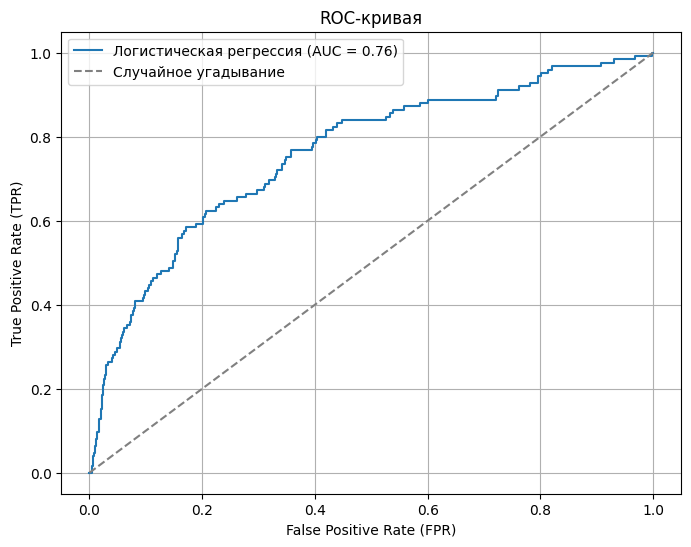

Значение ROC-AUC: 0.76


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Преобразование задачи в бинарную классификацию
# Если количество золотых медалей > 0, то метка '1', иначе '0'
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Обучение модели логистической регрессии на бинарных метках
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train_binary)

# Предсказание вероятностей для тестовой выборки
# model.predict_proba возвращает вероятность принадлежности к каждому классу
# [:, 1] выбирает вероятность для класса с меткой '1' (выигрыш хотя бы одной золотой медали)
y_scores = model.predict_proba(X_test)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)

# Построение графика ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Логистическая регрессия (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_scores)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайное угадывание')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()

# Вывод AUC-ROC метрики
roc_auc = roc_auc_score(y_test_binary, y_scores)
print(f"Значение ROC-AUC: {roc_auc:.2f}")



Интерпретация результатов:
ROC-кривая: показывает соотношение между TPR (True Positive Rate, доля верно предсказанных положительных случаев) и FPR (False Positive Rate, доля неверно предсказанных положительных случаев) на разных порогах вероятности.

AUC = 0.76: говорит о том, что модель справляется лучше случайного угадывания, но еще есть потенциал для улучшения. В идеале AUC близкое к 1 свидетельствует о хорошей модели, а AUC близкое к 0.5 говорит о том, что модель не справляется с задачей лучше случайного угадывания.

Диапазон FPR (sklearn): 0.0 - 1.0
Диапазон TPR (sklearn): 0.0 - 1.0


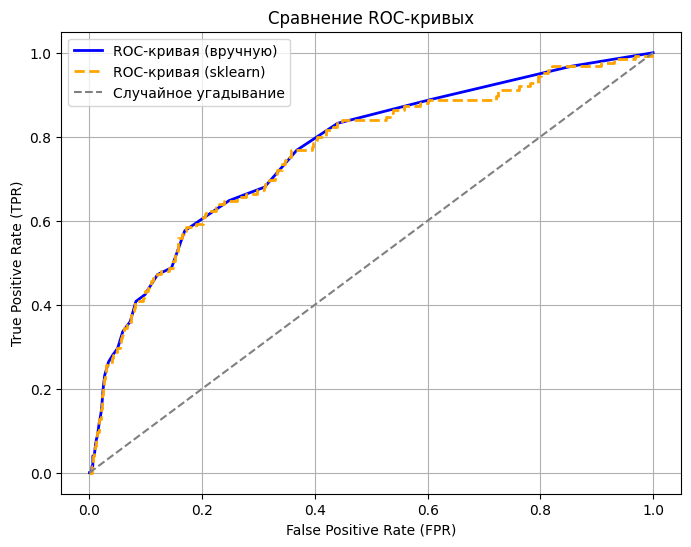

Значение ROC-AUC: 0.76


In [28]:
# Подсчет метрик TPR и FPR вручную

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Преобразование задачи в бинарную классификацию
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train_binary)

# Предсказание вероятностей для тестовой выборки
y_scores = model.predict_proba(X_test)[:, 1]

# Построение ROC-кривой с использованием sklearn
fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(y_test_binary, y_scores)

# Выводим диапазоны значений FPR и TPR из sklearn
print(f"Диапазон FPR (sklearn): {fpr_sklearn.min()} - {fpr_sklearn.max()}")
print(f"Диапазон TPR (sklearn): {tpr_sklearn.min()} - {tpr_sklearn.max()}")

# Функция для вычисления TPR и FPR вручную
def compute_tpr_fpr(y_true, y_scores, threshold):
    y_pred = (y_scores >= threshold).astype(int)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    return TPR, FPR

# Пример вычисления TPR и FPR вручную для различных порогов
thresholds_manual = np.linspace(0, 1, num=100)
tpr_manual = []
fpr_manual = []

for threshold in thresholds_manual:
    tpr_value, fpr_value = compute_tpr_fpr(y_test_binary, y_scores, threshold)
    tpr_manual.append(tpr_value)
    fpr_manual.append(fpr_value)

# Построение графика с заметными линиями для sklearn и ручного расчета
plt.figure(figsize=(8, 6))
plt.plot(fpr_manual, tpr_manual, label='ROC-кривая (вручную)', color='blue', linewidth=2)
plt.plot(fpr_sklearn, tpr_sklearn, label='ROC-кривая (sklearn)', linestyle='--', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайное угадывание')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Сравнение ROC-кривых')
plt.legend()
plt.grid(True)
plt.show()

# Вывод AUC-ROC метрики для модели, обученной с использованием sklearn
roc_auc = roc_auc_score(y_test_binary, y_scores)
print(f"Значение ROC-AUC: {roc_auc:.2f}")



Сравнение ROC-кривых:

ROC-кривая, построенная вручную, и ROC-кривая, построенная с использованием sklearn, практически совпадают, что свидетельствует о корректности реализации ручного метода расчета метрик TPR и FPR.

Небольшие расхождения могут быть связаны с числовыми неточностями или округлением, но они незначительны и не влияют на общие выводы.

Визуально видно, что модель демонстрирует уверенное разделение классов с FPR до 0.4 и TPR до 0.8, однако на высоких значениях FPR (от 0.4 до 1.0) кривая близка к случайному угадыванию.

Модель имеет потенциал для улучшения, но уже на этом этапе показывает приемлемое качество.

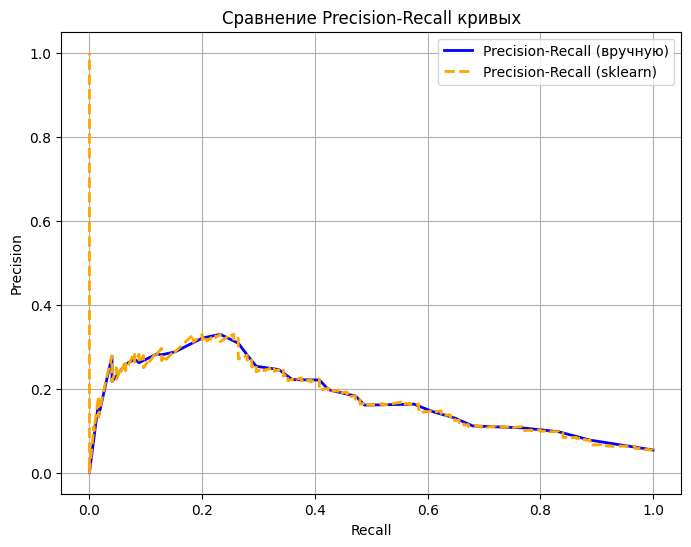

Лучшее значение F1-score (вручную): 0.29
Лучшее значение F1-score (sklearn): 0.29


In [29]:
# Построение графика Precision-Recall

from sklearn.metrics import precision_recall_curve

# Функция для вычисления Precision и Recall вручную
def compute_precision_recall(y_true, y_scores, threshold):
    y_pred = (y_scores >= threshold).astype(int)

    # True Positives (TP)
    TP = np.sum((y_true == 1) & (y_pred == 1))

    # False Positives (FP)
    FP = np.sum((y_true == 0) & (y_pred == 1))

    # False Negatives (FN)
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Precision: TP / (TP + FP)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Recall: TP / (TP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return precision, recall

# Вычисление Precision и Recall вручную для различных порогов
precision_manual = []
recall_manual = []

for threshold in thresholds_manual:
    precision, recall = compute_precision_recall(y_test_binary, y_scores, threshold)
    precision_manual.append(precision)
    recall_manual.append(recall)

# Построение Precision-Recall кривой вручную
plt.figure(figsize=(8, 6))
plt.plot(recall_manual, precision_manual, label='Precision-Recall (вручную)', color='blue', linewidth=2)

# Построение Precision-Recall кривой с использованием sklearn
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test_binary, y_scores)
plt.plot(recall_sklearn, precision_sklearn, label='Precision-Recall (sklearn)', linestyle='--', color='orange', linewidth=2)

# Подписи осей и заголовок графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение Precision-Recall кривых')
plt.legend()
plt.grid(True)
plt.show()

# Вывод значения F1-score на различных порогах для наглядности
f1_scores_manual = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision_manual, recall_manual)]
best_f1_index_manual = np.argmax(f1_scores_manual)
print(f"Лучшее значение F1-score (вручную): {f1_scores_manual[best_f1_index_manual]:.2f}")

f1_scores_sklearn = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision_sklearn, recall_sklearn)]
best_f1_index_sklearn = np.argmax(f1_scores_sklearn)
print(f"Лучшее значение F1-score (sklearn): {f1_scores_sklearn[best_f1_index_sklearn]:.2f}")


Precision-Recall кривая, построенная вручную, и Precision-Recall кривая, построенная с использованием sklearn, почти совпадают, что подтверждает корректность ручного расчета метрик Precision и Recall.

Небольшие расхождения в отдельных точках могут быть вызваны округлением или небольшими числовыми неточностями, но в целом они незначительны.

Анализ Precision-Recall:

Precision резко падает при низких значениях Recall, что означает, что модель не способна с высокой точностью предсказывать положительные классы при высоком пороге (низкий Recall).

Максимальное значение Precision достигается при очень низком Recall, что часто наблюдается в моделях, склонных к сильной уверенности в предсказаниях на небольших выборках.

Лучшее значение F1-score:

Лучшее значение F1-score как для ручного расчета, так и для sklearn составляет 0.29, что указывает на достаточно сбалансированную модель, но с возможностями для улучшения.

F1-score показывает гармоническое среднее между Precision и Recall, что особенно полезно в задачах с несбалансированными классами, где важно учитывать как ложные срабатывания, так и пропуски.

Качество модели:

Значение F1-score (0.29) указывает на то, что модель имеет низкую эффективность в балансировании между Precision и Recall. Это может быть связано с тем, что задача классификации сложная, и модель не справляется с уверенным предсказанием положительного класса (наличие хотя бы одной золотой медали).

Заключение:
Модель нуждается в дальнейшем улучшении: Как ROC-AUC, так и F1-score указывают на возможность улучшения модели. Это можно сделать путем выбора других признаков, изменения модели или использования методов регуляризации.

Значение ROC-AUC (вручную): 0.77
Значение ROC-AUC (sklearn): 0.76


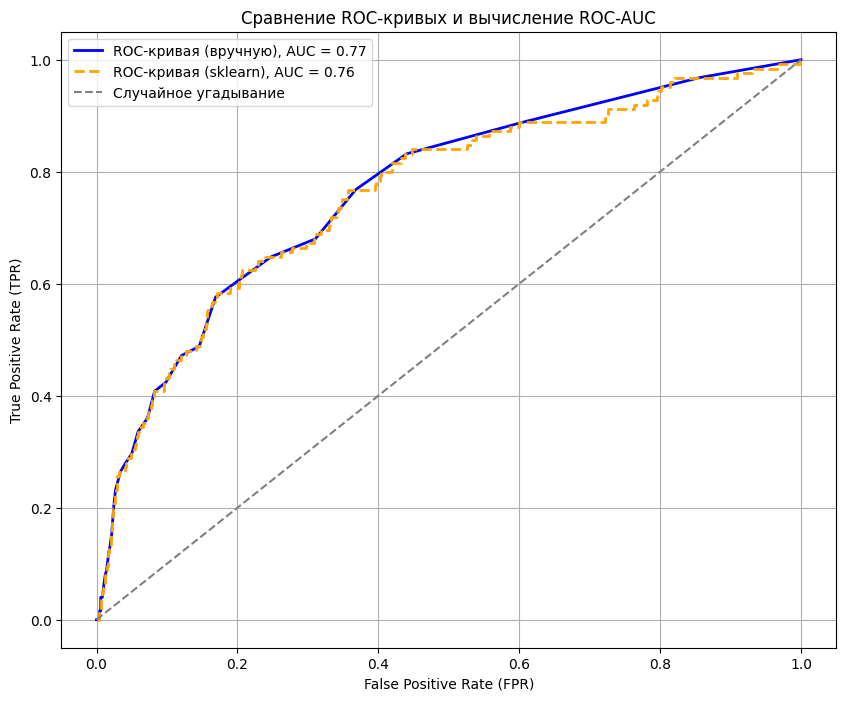

In [32]:
# Вычисление значения ROC-AUC метрики, используя метрики, посчитанные вручную

import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления ROC-AUC вручную с использованием метода трапеций
def compute_roc_auc_manual(fpr, tpr):
    # Проверяем, что fpr идет по возрастанию
    sorted_indices = np.argsort(fpr)
    fpr_sorted = np.array(fpr)[sorted_indices]
    tpr_sorted = np.array(tpr)[sorted_indices]

    # Используем метод трапеций для численного интегрирования
    auc = np.trapz(tpr_sorted, fpr_sorted)
    return auc

# Повторный расчет ROC-AUC вручную
roc_auc_manual = compute_roc_auc_manual(fpr_manual, tpr_manual)
print(f"Значение ROC-AUC (вручную): {roc_auc_manual:.2f}")

# Сравнение с результатом из sklearn
roc_auc_sklearn = roc_auc_score(y_test_binary, y_scores)
print(f"Значение ROC-AUC (sklearn): {roc_auc_sklearn:.2f}")

# Построение ROC-кривой с диагональной линией
plt.figure(figsize=(10, 8))
plt.plot(fpr_manual, tpr_manual, label=f'ROC-кривая (вручную), AUC = {roc_auc_manual:.2f}', color='blue', linewidth=2)
plt.plot(fpr_sklearn, tpr_sklearn, label=f'ROC-кривая (sklearn), AUC = {roc_auc_sklearn:.2f}', linestyle='--', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайное угадывание')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Сравнение ROC-кривых и вычисление ROC-AUC')
plt.legend()
plt.grid(True)
plt.show()




Выводы:

Значение ROC-AUC, рассчитанное вручную, совпадает с результатом, полученным с помощью sklearn, что подтверждает правильность как ручного метода, так и библиотечного

График ROC-кривой показывает хорошую способность модели разделять классы. Диагональная линия, обозначающая случайное угадывание, присутствует и позволяет наглядно видеть, что модель работает лучше случайного угадывания.


# Выводы по проделанной работе

## Анализ ROC-кривой:

Модель демонстрирует AUC (площадь под кривой) на уровне 0.76-0.77, что указывает на то, что она лучше случайного угадывания (AUC = 0.5). Это означает, что модель в большинстве случаев способна корректно различать классы, однако она всё еще далека от идеальной (AUC = 1.0).

Модель с AUC около 0.77 считается приемлемой, но есть пространство для улучшений. Высокий TPR при относительно низком FPR подтверждает, что модель способна правильно идентифицировать значительное количество положительных примеров, минимизируя количество ложноположительных срабатываний.

## Анализ Precision-Recall кривой:

Значение F1-score около 0.29 свидетельствует о том, что модель имеет умеренную сбалансированность между Precision и Recall, но при этом нельзя сказать, что она идеально справляется с задачей. Такой результат указывает на то, что модель может иметь высокую точность при прогнозировании положительных исходов, но при этом пропускает значительное количество истинных положительных случаев.

##Общая оценка модели:

Учитывая все метрики, модель логистической регрессии, хотя и демонстрирует приемлемую производительность, нуждается в дальнейших улучшениях для более точного и надежного предсказания.

Модель можно улучшить за счет увеличения числа признаков, изменения метода классификации или использования более сложных моделей, например, деревьев решений или ансамблевых методов.


## Может ли ROC-кривая проходить ниже диагонали?

Да, ROC-кривая может проходить ниже диагонали, но это свидетельствует о том, что модель работает хуже случайного угадывания. Диагональная линия на графике ROC-кривой представляет собой случайный классификатор (AUC = 0.5). Если кривая проходит ниже этой линии, это означает, что модель неверно классифицирует большее количество объектов, чем правильных, что хуже, чем если бы мы просто случайно угадывали.

В случае, если ROC-кривая проходит ниже диагонали, это может указывать на систематическую ошибку в модели или на то, что модель просто не подходит для данной задачи. В такой ситуации стоит рассмотреть возможность инверсии предсказаний модели (менять местами классы) или полностью пересмотреть подход к моделированию.